In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load cleansed data
telecom_df_new = pd.read_excel('DataCleansing_Telecom_Churn.xlsx')
telecom_df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [3]:
telecom_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5960 non-null   object 
 1   gender            5960 non-null   object 
 2   SeniorCitizen     5960 non-null   int64  
 3   Partner           5960 non-null   object 
 4   Dependents        5960 non-null   object 
 5   tenure            5960 non-null   int64  
 6   PhoneService      5960 non-null   object 
 7   MultipleLines     5960 non-null   object 
 8   InternetService   5960 non-null   object 
 9   OnlineSecurity    5960 non-null   object 
 10  OnlineBackup      5960 non-null   object 
 11  DeviceProtection  5960 non-null   object 
 12  TechSupport       5960 non-null   object 
 13  StreamingTV       5960 non-null   object 
 14  StreamingMovies   5960 non-null   object 
 15  Contract          5960 non-null   object 
 16  PaperlessBilling  5960 non-null   object 


In [4]:
#set customerid as index
telecom_df_new.set_index('customerID', inplace=True)
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [5]:
#Convert nominal categorical variables to dummy variables
Gender = pd.get_dummies(telecom_df_new['gender'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, Gender], axis=1)
telecom_df_new.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No,1
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1


In [6]:
#Replace rows with 'No internet service' with 'No'
telecom_df_new=telecom_df_new.replace('No internet service', 'No')
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Male
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No,No,...,No,No,No,Two year,No,Credit card (automatic),24.10,1734.65,No,1
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,1
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,1


In [7]:
#Convert other nominal categorical variables to dummy variables
senior = pd.get_dummies(telecom_df_new['SeniorCitizen'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, senior], axis=1)

partner = pd.get_dummies(telecom_df_new['Partner'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, partner], axis=1)


dependents = pd.get_dummies(telecom_df_new['Dependents'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, dependents], axis=1)


phone = pd.get_dummies(telecom_df_new['PhoneService'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, phone], axis=1)


lines = pd.get_dummies(telecom_df_new['MultipleLines'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, lines], axis=1)


internet = pd.get_dummies(telecom_df_new['InternetService'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, internet], axis=1)


security = pd.get_dummies(telecom_df_new['OnlineSecurity'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, security], axis=1)


backup = pd.get_dummies(telecom_df_new['OnlineBackup'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, backup], axis=1)


protection = pd.get_dummies(telecom_df_new['DeviceProtection'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, protection], axis=1)


support = pd.get_dummies(telecom_df_new['TechSupport'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, support], axis=1)


tv = pd.get_dummies(telecom_df_new['StreamingTV'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, tv], axis=1)


movies = pd.get_dummies(telecom_df_new['StreamingMovies'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, movies], axis=1)


paperless = pd.get_dummies(telecom_df_new['PaperlessBilling'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, paperless], axis=1)


payment = pd.get_dummies(telecom_df_new['PaymentMethod'], drop_first=True)
telecom_df_new = pd.concat([telecom_df_new, payment], axis=1)

telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),Electronic check,Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,0,1,1,0,1,0,1,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,0,0,0,0,0,0,1,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,...,0,0,0,0,0,1,1,0,1,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,1,0,1,0,0,0,0,0,1,0


In [8]:
#Map ordinal values to the Contract feature
telecom_df_new['Contract'] = telecom_df_new['Contract'].map({'Month-to-month': 1, 'One year': 2, 'Two year': 3})
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),Electronic check,Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,0,1,1,0,1,0,1,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,0,0,0,0,0,0,1,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,...,0,0,0,0,0,1,1,0,1,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,1,0,1,0,0,0,0,0,1,0


In [9]:
#Map values to the Target
telecom_df_new['Churn'] = telecom_df_new['Churn'].map({'Yes': 1, 'No': 0})
telecom_df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic),Electronic check,Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No,No,...,0,0,0,0,0,0,0,1,0,0
9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,...,0,1,1,0,1,0,1,1,0,0
9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,0,0,0,0,0,0,1,0,0,0
6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,...,0,0,0,0,0,1,1,0,1,0
2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,...,1,0,1,0,0,0,0,0,1,0


In [10]:
#create features variable
X = telecom_df_new.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn'], axis=1).values
X.shape

(5960, 23)

In [11]:
#create target variable
y = telecom_df_new['Churn'].values
y.shape

(5960,)

In [12]:
#Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=40, stratify=y)

In [13]:
#Standardize X_train and X_test data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#GridSearch the KNeighborsClassifier on Dataset for optimal hyperparameters
knc = KNeighborsClassifier()
parameters = [{
    'n_neighbors': [6, 7, 8, 9, 10, 11, 12, 13, 14],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'brute', 'kd_tree', 'ball_tree']
    
}]
search_knc = GridSearchCV(knc, parameters, scoring='accuracy', cv=3)

result = search_knc.fit(X_train, y_train)
print(result.best_score_)
print(result.best_params_)

0.7862974202596845
{'algorithm': 'auto', 'n_neighbors': 14, 'weights': 'uniform'}


In [15]:
#GridSearch the RandomForestClassifier on Dataset for optimal hyperparameters
rfc = RandomForestClassifier()

parameters = [{
    'n_estimators': np.linspace(60, 90, 30).astype(int),
    'max_depth': [3, 4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}]   
search_rfc = GridSearchCV(rfc, parameters, scoring='accuracy', cv=3)

result = search_rfc.fit(X_train, y_train)
print(result.best_score_)
print(result.best_params_)

0.8105328400925885
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 86}


In [16]:
#GridSearch the XGBClassifier on Dataset for optimal hyperparameters
xgbc = XGBClassifier()

parameters = [{
    'n_estimators': np.linspace(60, 95, 35).astype(int),
    'max_depth': [3],
    'booster': ['gbtree', 'gblinear', 'dart']
}]   
search_xgbc = GridSearchCV(xgbc, parameters, scoring='accuracy', cv=3)

result = search_xgbc.fit(X_train, y_train)
print(result.best_score_)
print(result.best_params_)

[18:13:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:13:37] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.

Use the best parameters result of the Gridsearch to create the models and evaluate them:


In [17]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=14, weights='uniform')
knn.fit(X_train,y_train)
print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

Training accuracy: 0.8100675833139128
Test accuracy: 0.7681246255242661


In [18]:
rf = RandomForestClassifier(n_estimators=86, max_depth=8, criterion='entropy')
rf.fit(X_train,y_train)
print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

Training accuracy: 0.8454905616406432
Test accuracy: 0.7837028160575195


In [19]:
xgb = XGBClassifier(n_estimators=64, max_depth=3, booster='gblinear')
xgb.fit(X_train,y_train)
print('Training accuracy:', xgb.score(X_train, y_train))
print('Test accuracy:', xgb.score(X_test, y_test))

[18:15:30] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Training accuracy: 0.8072710323933815
Test accuracy: 0.786698621929299


In [20]:
accuracy_df = pd.read_excel('Model Accuracies.xlsx')
accuracy_df.head()

,Model,Training,Testing
0,XGBoost,80.72,78.66
1,RandomForest,82.98,78.37
2,KNN,81.06,76.81


<AxesSubplot:xlabel='Model', ylabel='Testing'>

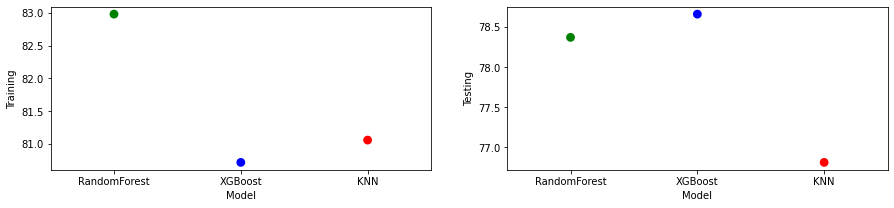

In [21]:
fig, axs = plt.subplots(ncols=2, figsize=(15,3))
sns.pointplot(x='Model', y='Training', data=accuracy_df, order=['RandomForest', 'XGBoost','KNN'], palette=['green', 'blue', 'red'], ax=axs[0])
sns.pointplot(x='Model', y='Testing', data=accuracy_df, order=['RandomForest', 'XGBoost','KNN'], palette=['green', 'blue', 'red'], linestyles='--', ax=axs[1])
#sns.lineplot(x='Training', y='Testing', hue="Model", data=accuracy_df, ax=axs[2])
